In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# สร้างข้อมูลตัวอย่าง
# สมมติว่ามีข้อมูล 5 ตัวอย่าง และ 3 features (Input 3 nodes)
X = np.array([[0.1, 0.2, 0.3],
              [0.4, 0.5, 0.6],
              [0.7, 0.8, 0.9],
              [1.0, 1.1, 1.2],
              [1.3, 1.4, 1.5]])

# Output คือการจำแนก 2 class (Output 2 nodes)
y = np.array([[1, 0],  # Class 1
              [0, 1],  # Class 2
              [1, 0],  # Class 1
              [0, 1],  # Class 2
              [1, 0]])  # Class 1

# การแบ่งข้อมูลเป็น Training และ Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สเกลข้อมูล (Normalization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# สร้างโมเดล ANN
model = Sequential()

# เพิ่ม input layer และ hidden layer
model.add(Dense(units=4, activation='relu', input_dim=3))  # Hidden layer ที่มี 4 nodes
model.add(Dense(units=2, activation='softmax'))  # Output layer ที่มี 2 nodes (สำหรับการจำแนก 2 class)

# คอมไพล์โมเดล
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ฝึกโมเดล
model.fit(X_train, y_train, epochs=100, batch_size=1)

# ทดสอบโมเดล
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.1000 - loss: 1.1793   
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4667 - loss: 0.9384
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4667 - loss: 1.0637
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2667 - loss: 1.6533    
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1000 - loss: 1.1214    
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4667 - loss: 0.9157
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1000 - loss: 1.2869    
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.1000 - loss: 1.0865     
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.1000 - loss: 1.2568     
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.1000 - loss: 1.0632     
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2667 - loss: 1.5139     
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0

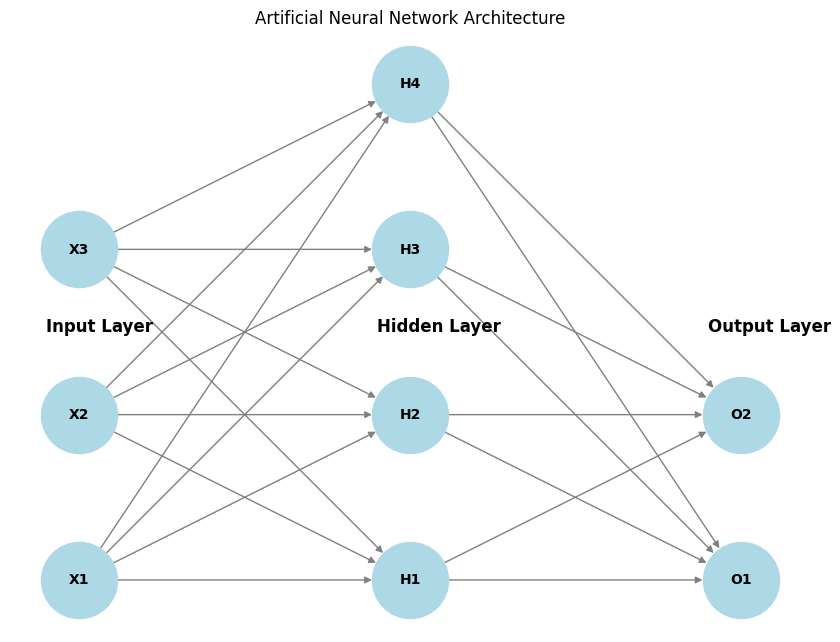

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

# สร้างกราฟ
G = nx.DiGraph()

# เพิ่ม nodes สำหรับแต่ละ layer
input_nodes = ['X1', 'X2', 'X3']  # Input layer
hidden_nodes = ['H1', 'H2', 'H3', 'H4']  # Hidden layer
output_nodes = ['O1', 'O2']  # Output layer

# เพิ่ม edges (การเชื่อมต่อระหว่าง nodes)
for input_node in input_nodes:
    for hidden_node in hidden_nodes:
        G.add_edge(input_node, hidden_node)

for hidden_node in hidden_nodes:
    for output_node in output_nodes:
        G.add_edge(hidden_node, output_node)

# วาดกราฟ
pos = {}

# กำหนดตำแหน่งของ nodes
for i, node in enumerate(input_nodes):
    pos[node] = (0, i)
for i, node in enumerate(hidden_nodes):
    pos[node] = (1, i)
for i, node in enumerate(output_nodes):
    pos[node] = (2, i)

# วาดกราฟและตั้งค่า layout
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')

# เพิ่ม label สำหรับ layers
plt.text(-0.1, 1.5, 'Input Layer', fontsize=12, fontweight='bold')
plt.text(0.9, 1.5, 'Hidden Layer', fontsize=12, fontweight='bold')
plt.text(1.9, 1.5, 'Output Layer', fontsize=12, fontweight='bold')

# แสดงกราฟ
plt.title('Artificial Neural Network Architecture')
plt.axis('off')
plt.show()


In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# โหลดข้อมูล Iris dataset
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Target: 3 classes (Setosa, Versicolor, Virginica)

# แปลงข้อมูล target เป็น one-hot encoding
y = to_categorical(y, num_classes=3)

# แบ่งข้อมูลเป็น training และ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สเกลข้อมูล (Normalization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# สร้างโมเดล ANN
model = Sequential()
model.add(Dense(units=8, activation='relu', input_dim=4))  # Hidden layer ที่มี 8 nodes
model.add(Dense(units=3, activation='softmax'))  # Output layer ที่มี 3 nodes (สำหรับ 3 class)

# คอมไพล์โมเดล
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ฝึกโมเดล
history = model.fit(X_train, y_train, epochs=100, batch_size=5, validation_data=(X_test, y_test))

# ทดสอบโมเดล
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# ทำการทำนายผลจากข้อมูลทดสอบ
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# แสดงผลทำนาย
print(f"Predictions (0: Setosa, 1: Versicolor, 2: Virginica): {predicted_classes}")
# บันทึกโมเดลที่ฝึกแล้วไปยังไฟล์
model.save('iris_model.h5')  # บันทึกเป็นไฟล์ .h5



Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3169 - loss: 1.2798 - val_accuracy: 0.4667 - val_loss: 1.0931
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4688 - loss: 1.0744 - val_accuracy: 0.5000 - val_loss: 0.9498
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5093 - loss: 0.9782 - val_accuracy: 0.5333 - val_loss: 0.8402
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5814 - loss: 0.8438 - val_accuracy: 0.6333 - val_loss: 0.7450
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6477 - loss: 0.7790 - val_accuracy: 0.7000 - val_loss: 0.6758
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7078 - loss: 0.6725 - val_accuracy: 0.7000 - val_loss: 0.6232
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6276 - loss: 0.6704 - val_accuracy: 0.7000 - val_loss: 0.5820
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6967 - loss: 0.5900 - val_accuracy: 0.7000 - val_loss: 0.

Predictions (0: Setosa, 1: Versicolor, 2: Virginica): [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [7]:
pip install plotly


In [12]:
import plotly.graph_objects as go

def plot_nn(input_size, hidden_size, output_size):
    fig = go.Figure()

    # Draw input layer nodes
    for i in range(input_size):
        fig.add_trace(go.Scatter(x=[0], y=[i], mode='markers+text', text=[f'Input {i+1}'], textposition="top center", marker=dict(size=20)))

    # Draw hidden layer nodes
    for i in range(hidden_size):
        fig.add_trace(go.Scatter(x=[1], y=[i], mode='markers+text', text=[f'Hidden {i+1}'], textposition="top center", marker=dict(size=20)))

    # Draw output layer nodes
    for i in range(output_size):
        fig.add_trace(go.Scatter(x=[2], y=[i], mode='markers+text', text=[f'Output {i+1}'], textposition="top center", marker=dict(size=20)))

    # Draw edges between input layer and hidden layer
    for i in range(input_size):
        for j in range(hidden_size):
            fig.add_trace(go.Scatter(x=[0, 1], y=[i, j], mode='lines', line=dict(color='black', width=1)))

    # Draw edges between hidden layer and output layer
    for i in range(hidden_size):
        for j in range(output_size):
            fig.add_trace(go.Scatter(x=[1, 2], y=[i, j], mode='lines', line=dict(color='black', width=1)))

    fig.update_layout(
        showlegend=False,
        xaxis=dict(range=[-0.5, 2.5], showgrid=False, zeroline=False),
        yaxis=dict(showgrid=False, zeroline=False),
        title="Artificial Neural Network Architecture (Iris Dataset)"
    )
    fig.show()

# Parameters: input_size, hidden_size, output_size
plot_nn(4, 8, 3)  # ตัวอย่าง input 4 nodes (ตามจำนวน feature ของ Iris), hidden layer 8 nodes, output 3 nodes (สำหรับ 3 classes)


In [14]:
#ทดสอบ IRIS
# โหลดโมเดลที่บันทึกไว้
loaded_model = tf.keras.models.load_model('/content/iris_model.h5')

# ทดสอบโมเดลที่โหลดมา
loss, accuracy = loaded_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# ทำการทำนายผลจากข้อมูลทดสอบ
predictions = loaded_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# แสดงผลทำนาย
print(f"Predictions (0: Setosa, 1: Versicolor, 2: Virginica): {predicted_classes}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 1.0000 - loss: 0.1064
Test Loss: 0.10643718391656876, Test Accuracy: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predictions (0: Setosa, 1: Versicolor, 2: Virginica): [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [15]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# โหลดโมเดลที่บันทึกไว้
loaded_model = tf.keras.models.load_model('/content/iris_model.h5')

# ข้อมูลใหม่ที่ต้องการทดสอบ (สมมติว่าเป็นข้อมูลของดอกไม้ชนิดหนึ่ง)
new_data = np.array([[5.1, 3.5, 1.4, 0.2]])  # ตัวอย่างข้อมูลใหม่ (sepal length, sepal width, petal length, petal width)

# ทำการสเกลข้อมูลใหม่ด้วย StandardScaler ที่ใช้ตอนฝึก
scaler = StandardScaler()

# สมมติว่าข้อมูลฝึกที่ใช้มีการสเกลแล้ว เราต้องทำการฟิตกับข้อมูลใหม่ให้เหมือนกับข้อมูลที่ฝึก
# ในกรณีนี้เราควรใช้ค่า mean และ std จากข้อมูลการฝึก (ที่ใช้ก่อนหน้านี้) แต่ในที่นี้จะใช้ตัว scaler ใหม่
new_data_scaled = scaler.fit_transform(new_data)

# ทำนายผลจากข้อมูลใหม่
prediction = loaded_model.predict(new_data_scaled)

# แสดงผลทำนาย (คาดการณ์ว่าเป็นคลาสไหน: 0 = Setosa, 1 = Versicolor, 2 = Virginica)
predicted_class = np.argmax(prediction, axis=1)
print(f"Predicted class for new data: {predicted_class[0]}")  # แสดงคลาสที่ทำนายได้


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted class for new data: 1
